In [1]:
import yfinance as yahooFinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="darkgrid")
pd.set_option('display.max_rows', None)

In [2]:
# Function to calculate percentage difference
def calculate_pct_diff(row):
    pct_diff = []
    for i in range(len(row) - 1):
        if pd.notna(row.iloc[i+1]) and pd.notna(row.iloc[i]):  # Use .iloc for position-based indexing
            diff = ((row.iloc[i] - row.iloc[i+1]) / row.iloc[i+1]) * 100
            pct_diff.append(diff)
        else:
            pct_diff.append(np.nan)
    return pct_diff

In [3]:
ticker = "EPD"

 # 1. Stock Information

In [4]:
stock = yahooFinance.Ticker(ticker)

In [5]:
stock_info = stock.info
stock_info

{'address1': '1100 Louisiana Street',
 'address2': '10th Floor',
 'city': 'Houston',
 'state': 'TX',
 'zip': '77002',
 'country': 'United States',
 'phone': '713 381 6500',
 'website': 'https://www.enterpriseproducts.com',
 'industry': 'Oil & Gas Midstream',
 'industryKey': 'oil-gas-midstream',
 'industryDisp': 'Oil & Gas Midstream',
 'sector': 'Energy',
 'sectorKey': 'energy',
 'sectorDisp': 'Energy',
 'longBusinessSummary': 'Enterprise Products Partners L.P. provides midstream energy services to producers and consumers of natural gas, natural gas liquids (NGLs), crude oil, petrochemicals, and refined products. It operates in four segments: NGL Pipelines & Services, Crude Oil Pipelines & Services, Natural Gas Pipelines & Services, and Petrochemical & Refined Products Services. The NGL Pipelines & Services segment offers natural gas processing and related NGL marketing services. It operates natural gas processing facilities located in Colorado, Louisiana, Mississippi, New Mexico, Texas

In [6]:
market_cap = stock_info['marketCap']
market_cap

72464326656

In [7]:
exchange = stock_info['exchange']
exchange

'NYQ'

In [8]:
averageVolume = stock_info['averageVolume']
averageVolume

4504457

In [9]:
averageVolume10days = stock_info['averageVolume10days']
averageVolume10days

5024610

In [10]:
currentPrice = stock_info['currentPrice']
currentPrice

33.46

In [11]:
fiftyDayAverage_stockPrice = stock_info['fiftyDayAverage']
fiftyDayAverage_stockPrice

32.8768

In [12]:
twoHundredDayAverage_StockPrice = stock_info['twoHundredDayAverage']
twoHundredDayAverage_StockPrice

30.4344

In [13]:
try:
  trailingPE = stock_info['trailingPE']
  print(trailingPE)
except Exception:
  print("An exception occurred") 

12.438662


In [14]:
try:
  forwardPE = stock_info['forwardPE']
  print(forwardPE)
except Exception:
  print("An exception occurred") 

11.740351


In [15]:
priceToBook = stock_info['priceToBook']
priceToBook

2.522047

In [16]:
currentRatio = stock_info['currentRatio']
currentRatio

0.997

In [17]:
trailingEps = stock_info['trailingEps']
trailingEps

2.69

In [18]:
forwardEps = stock_info['forwardEps']
forwardEps

2.85

In [19]:
try:
  earningsGrowth = stock_info['earningsGrowth']
  print(earningsGrowth)
except Exception:
  print("An exception occurred") 

0.033


In [20]:
beta = stock_info['beta']
beta

1.054

In [21]:
try:
  recommendationKey = stock_info['recommendationKey']
  print(recommendationKey)
except Exception:
  print("An exception occurred") 

buy


In [22]:
try:
  shareHolderRightsRisk = stock_info['shareHolderRightsRisk']
  print(shareHolderRightsRisk)
except Exception:
  print("An exception occurred") 

An exception occurred


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

 # 2. Holders

In [23]:
try:
  print(stock.major_holders)
except Exception:
  print("An exception occurred") 

Breakdown                          Value
insidersPercentHeld              0.33164
institutionsPercentHeld          0.25818
institutionsFloatPercentHeld     0.38629
institutionsCount             1569.00000


In [24]:
try:
  print(stock.institutional_holders)
except Exception:
  print("An exception occurred") 

  Date Reported                          Holder  pctHeld    Shares  \
0    2024-12-31              Alps Advisors Inc.   0.0182  39359425   
1    2024-12-31                    Invesco Ltd.   0.0125  27076718   
2    2024-12-31         Goldman Sachs Group Inc   0.0098  21252407   
3    2024-12-31                  Morgan Stanley   0.0096  20794156   
4    2024-12-31  American Century Companies Inc   0.0090  19443277   
5    2024-12-31             Sarofim, Fayez & Co   0.0081  17492880   
6    2024-12-31  Tortoise Capital Advisors, LLC   0.0072  15642522   
7    2024-12-31                  Blackstone Inc   0.0070  15265882   
8    2024-12-31     Neuberger Berman Group, LLC   0.0069  15005619   
9    2024-12-31                        FMR, LLC   0.0068  14734295   

        Value  pctChange  
0  1316966324     0.0344  
1   905986959     0.0134  
2   711105518     0.0048  
3   695772440     0.0965  
4   650572030    -0.0730  
5   585311748     0.0010  
6   523398771     0.0005  
7   510796397

In [25]:
try:
  print(stock.mutualfund_holders)
except:
  print("An exception occurred") 

  Date Reported                                             Holder  pctHeld  \
0    2024-11-30                        Alps ETF Tr-Alerian MLP ETF   0.0183   
1    2024-11-30                  Invesco Steelpath MLP Income Fund   0.0084   
2    2024-11-30    Kayne Anderson Energy Infrastructure Fund, Inc.   0.0048   
3    2024-12-31  First Trust North American Energy Infrastructu...   0.0035   
4    2024-12-31                     American Century Equity Income   0.0033   
5    2024-12-31                      Global X Fds-Global X MLP ETF   0.0032   
6    2024-10-31                     Blackrock Equity Dividend Fund   0.0030   
7    2024-10-31                         Principal Equity Income Fd   0.0025   
8    2024-11-30  Goldman Sachs Tr-Goldman Sachs MLP Energy Infr...   0.0025   
9    2024-12-31                American Century Mid Cap Value Fund   0.0023   

     Shares       Value  pctChange  
0  39584590  1324500345     0.0566  
1  18275000   611481483     0.0000  
2  10357488   34656

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 3. Actions - Dividends & Stock Splits

In [26]:
stock.actions

,Dividends,Stock Splits
Date,,
1998-10-28 00:00:00-05:00,0.11250,0.0
1999-01-27 00:00:00-05:00,0.11250,0.0
1999-04-28 00:00:00-04:00,0.11250,0.0
1999-07-28 00:00:00-04:00,0.11250,0.0
1999-10-27 00:00:00-04:00,0.11250,0.0
2000-01-27 00:00:00-05:00,0.12500,0.0
2000-04-26 00:00:00-04:00,0.12500,0.0
2000-07-27 00:00:00-04:00,0.13125,0.0
2000-10-27 00:00:00-04:00,0.13125,0.0


In [27]:
df_dividends = pd.DataFrame(stock.dividends)
df_new_dividends = df_dividends.groupby(['Date']).agg({'Dividends': 'sum'}).reset_index()
df_new_dividends

,Date,Dividends
0,1998-10-28 00:00:00-05:00,0.11250
1,1999-01-27 00:00:00-05:00,0.11250
2,1999-04-28 00:00:00-04:00,0.11250
3,1999-07-28 00:00:00-04:00,0.11250
4,1999-10-27 00:00:00-04:00,0.11250
5,2000-01-27 00:00:00-05:00,0.12500
6,2000-04-26 00:00:00-04:00,0.12500
7,2000-07-27 00:00:00-04:00,0.13125
8,2000-10-27 00:00:00-04:00,0.13125
9,2001-01-29 00:00:00-05:00,0.13750


In [28]:
df_new_dividends['Date_in_Datetime'] = pd.to_datetime(df_new_dividends['Date'])
df_new_dividends['Year'] = df_new_dividends['Date_in_Datetime'].dt.year
df_new_dividends

,Date,Dividends,Date_in_Datetime,Year
0,1998-10-28 00:00:00-05:00,0.11250,1998-10-28 00:00:00-05:00,1998
1,1999-01-27 00:00:00-05:00,0.11250,1999-01-27 00:00:00-05:00,1999
2,1999-04-28 00:00:00-04:00,0.11250,1999-04-28 00:00:00-04:00,1999
3,1999-07-28 00:00:00-04:00,0.11250,1999-07-28 00:00:00-04:00,1999
4,1999-10-27 00:00:00-04:00,0.11250,1999-10-27 00:00:00-04:00,1999
5,2000-01-27 00:00:00-05:00,0.12500,2000-01-27 00:00:00-05:00,2000
6,2000-04-26 00:00:00-04:00,0.12500,2000-04-26 00:00:00-04:00,2000
7,2000-07-27 00:00:00-04:00,0.13125,2000-07-27 00:00:00-04:00,2000
8,2000-10-27 00:00:00-04:00,0.13125,2000-10-27 00:00:00-04:00,2000
9,2001-01-29 00:00:00-05:00,0.13750,2001-01-29 00:00:00-05:00,2001


In [29]:
df_new_dividends_converted= df_new_dividends.groupby(['Year']).agg({'Dividends': 'sum'}).reset_index()
df_new_dividends_converted

,Year,Dividends
0,1998,0.11250
1,1999,0.45000
2,2000,0.51250
3,2001,0.57825
4,2002,0.66375
5,2003,0.72200
6,2004,0.75700
7,2005,0.83000
8,2006,0.89800
9,2007,0.95800


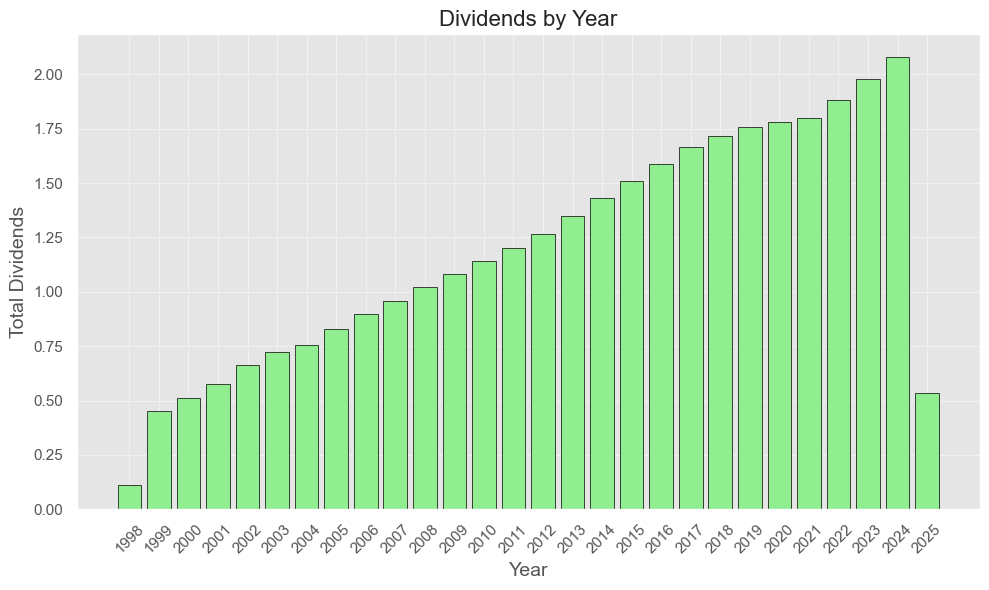

In [30]:
try:
    # Apply a style with more contrast
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))

    # Use a more contrasting color for the bars
    plt.bar(df_new_dividends_converted['Year'], df_new_dividends_converted['Dividends'], color='lightgreen', edgecolor='black')

    # Set x-axis ticks to display every year, and rotate them
    plt.xticks(np.arange(df_new_dividends_converted['Year'].min(), df_new_dividends_converted['Year'].max() + 1, 1), rotation=45)

    # Add labels and title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total Dividends', fontsize=14)
    plt.title('Dividends by Year', fontsize=16)

    # Improve grid visibility
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

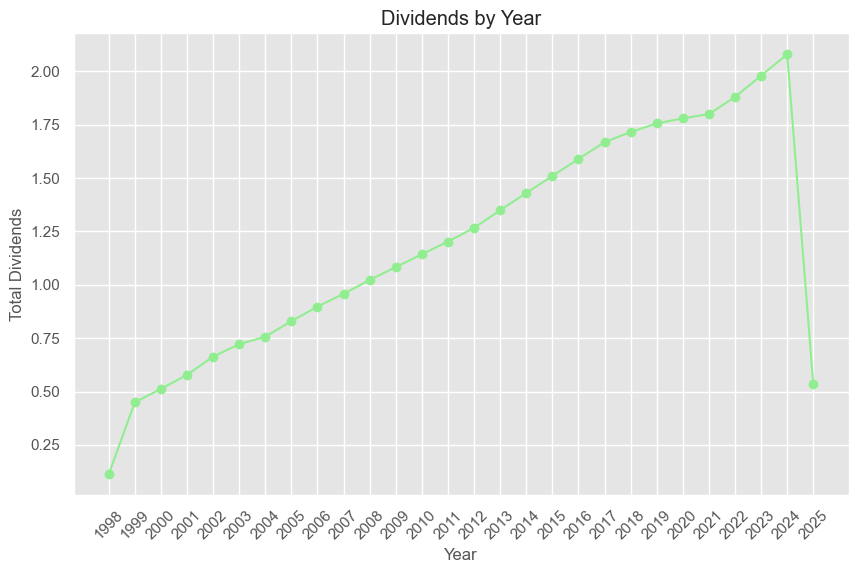

In [31]:
try:   
    # Define the style and figure size
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))

    # Plot the data
    plt.plot(df_new_dividends_converted['Year'], df_new_dividends_converted['Dividends'], marker = 'o', color='lightgreen')

    # Set x-axis ticks to display every year between 1 and rotate them
    plt.xticks(np.arange(df_new_dividends_converted['Year'].min(), df_new_dividends_converted['Year'].max() + 1, 1), rotation=45)

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Dividends')
    plt.title('Dividends by Year')

    # Show grid and plot
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

In [32]:
try:
    dividend_Yield = stock_info['dividendYield']
    print(dividend_Yield)
except Exception:
    print("An exception occurred") 

6.4


In [33]:
try:
    trailingAnnualDividendYield = stock_info['trailingAnnualDividendYield']
    print(trailingAnnualDividendYield)
except Exception:
    print("An exception occurred") 

0.06412213


In [34]:
try:
    avg_DvidendYield_5_years = stock_info['fiveYearAvgDividendYield']
    print(avg_DvidendYield_5_years)
except Exception:
    print("An exception occurred") 

7.88


In [35]:
try:
    payoutRatio = stock_info['payoutRatio']
    print(payoutRatio)
except Exception:
    print("An exception occurred") 

0.7732


In [36]:
stock.splits

Date
2002-05-16 00:00:00-04:00    2.0
2014-08-22 00:00:00-04:00    2.0
Name: Stock Splits, dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 4. Balance Sheet Statement

In [37]:
balance_sheet_df = pd.DataFrame(stock.balance_sheet).astype(float)
balance_sheet_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Treasury Shares Number,NaN,NaN,NaN,5.480735e+07,NaN
Ordinary Shares Number,2.165700e+09,2.168245e+09,2.170806e+09,2.176380e+09,NaN
Share Issued,2.165700e+09,2.168245e+09,2.170806e+09,2.231187e+09,NaN
Net Debt,3.131300e+10,2.856800e+10,2.821900e+10,2.671500e+10,NaN
Total Debt,3.226200e+10,2.907100e+10,2.863600e+10,2.987400e+10,NaN
Tangible Book Value,1.901500e+10,1.829500e+10,1.705000e+10,1.672900e+10,NaN
Invested Capital,6.062800e+10,5.642100e+10,5.491800e+10,5.486400e+10,NaN
Working Capital,-4.400000e+07,-8.830000e+08,-1.667000e+09,1.645000e+09,NaN
Net Tangible Assets,-9.717000e+09,-9.378000e+09,-9.573000e+09,-8.600000e+09,NaN
Capital Lease Obligations,3.660000e+08,3.230000e+08,3.410000e+08,3.390000e+08,NaN


In [38]:
balance_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, Treasury Shares Number to Cash And Cash Equivalents
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2024-12-31 00:00:00  72 non-null     float64
 1   2023-12-31 00:00:00  72 non-null     float64
 2   2022-12-31 00:00:00  72 non-null     float64
 3   2021-12-31 00:00:00  75 non-null     float64
 4   2020-12-31 00:00:00  2 non-null      float64
dtypes: float64(5)
memory usage: 3.5+ KB


## 4.1 Liabilities

In [39]:
balance_df_liabilities = balance_sheet_df.loc[['Payables And Accrued Expenses','Current Debt And Capital Lease Obligation','Long Term Debt And Capital Lease Obligation', 'Total Capitalization']]
balance_df_liabilities

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Payables And Accrued Expenses,1.273800e+10,1.076000e+10,9.389000e+09,9.345000e+09,NaN
Current Debt And Capital Lease Obligation,1.150000e+09,1.300000e+09,1.744000e+09,1.400000e+09,NaN
Long Term Debt And Capital Lease Obligation,3.111200e+10,2.777100e+10,2.689200e+10,2.847400e+10,NaN
Total Capitalization,5.947800e+10,5.512100e+10,5.317400e+10,5.346400e+10,NaN


In [40]:
pct_diff_balance_df_liabilities = balance_df_liabilities.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_liabilities.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_liabilities

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Payables And Accrued Expenses,18.382900,14.602194,0.470840,NaN
Current Debt And Capital Lease Obligation,-11.538462,-25.458716,24.571429,NaN
Long Term Debt And Capital Lease Obligation,12.030535,3.268630,-5.555946,NaN
Total Capitalization,7.904428,3.661564,-0.542421,NaN


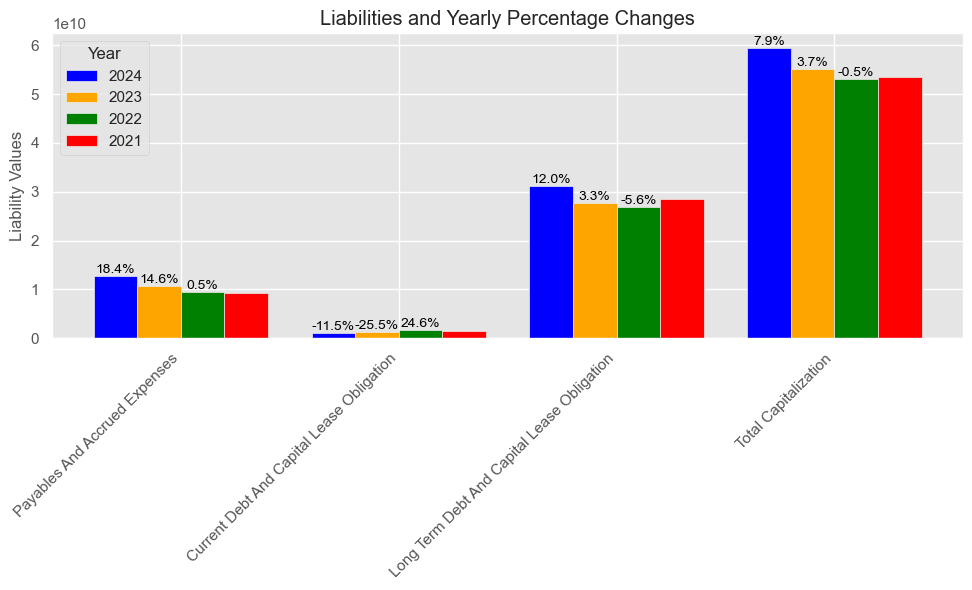

In [41]:
# Format column names
year_columns = [str(col)[:4] for col in balance_df_liabilities.columns]
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(balance_df_liabilities.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red']

for i, (col, color) in enumerate(zip(balance_df_liabilities.columns[:-1], colors)):
    values = balance_df_liabilities[col]
    ax.bar(x + i * width, values, width=width, label=str(col)[:4], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_liabilities.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_liabilities.index, rotation=45, ha='right')
ax.set_ylabel("Liability Values")
ax.set_title("Liabilities and Yearly Percentage Changes")
ax.legend(title="Year")
plt.tight_layout()
plt.show()

## 4.2 Assets 

In [42]:
balance_df_assets = balance_sheet_df.loc[['Receivables','Cash And Cash Equivalents','Net PPE','Goodwill And Other Intangible Assets']]
balance_df_assets

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Receivables,9.240000e+09,7.772000e+09,6.975000e+09,6.988000e+09,NaN
Cash And Cash Equivalents,5.830000e+08,1.800000e+08,7.600000e+07,2.820000e+09,NaN
Net PPE,4.906200e+10,4.580400e+10,4.440100e+10,4.208800e+10,NaN
Goodwill And Other Intangible Assets,9.717000e+09,9.378000e+09,9.573000e+09,8.600000e+09,NaN


In [43]:
pct_diff_balance_df_assets = balance_df_assets.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_assets.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_assets

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Receivables,18.888317,11.426523,-0.186033,NaN
Cash And Cash Equivalents,223.888889,136.842105,-97.304965,NaN
Net PPE,7.112916,3.159839,5.495628,NaN
Goodwill And Other Intangible Assets,3.614843,-2.036979,11.313953,NaN


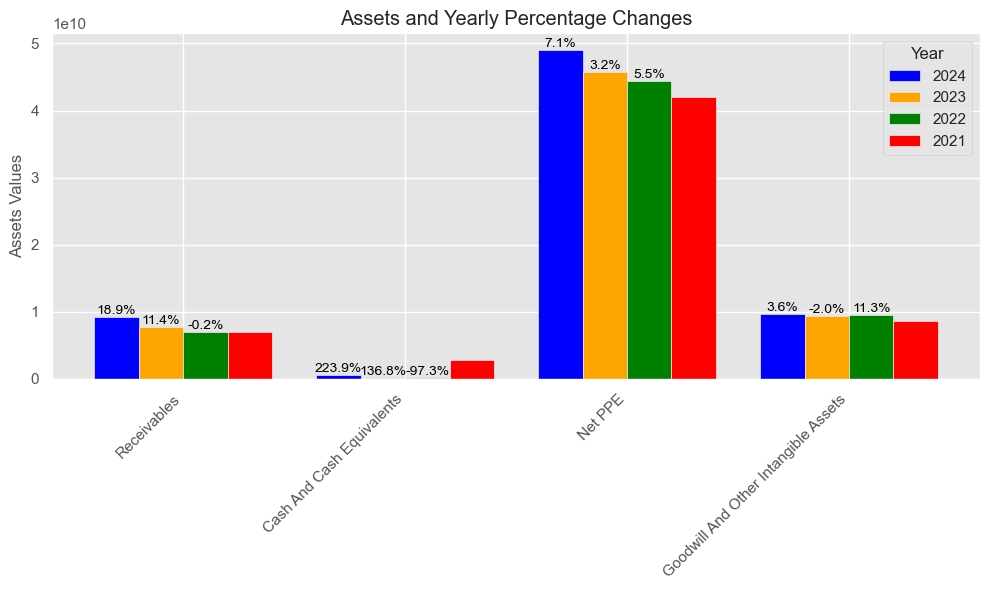

In [44]:
# Format column names
year_columns = [str(col)[:4] for col in balance_df_assets.columns]
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(balance_df_assets.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red']

for i, (col, color) in enumerate(zip(balance_df_assets.columns[:-1], colors)):
    values = balance_df_assets[col]
    ax.bar(x + i * width, values, width=width, label=str(col)[:4], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_assets.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_assets.index, rotation=45, ha='right')
ax.set_ylabel("Assets Values")
ax.set_title("Assets and Yearly Percentage Changes")
ax.legend(title="Year")
plt.tight_layout()
plt.show()

## 4.3 Balance Sheet for the last year with Vertical Analysis

In [45]:
balance_sheet_df_last = pd.DataFrame(balance_sheet_df.iloc[:,0])
balance_sheet_df_last

,2024-12-31
Treasury Shares Number,NaN
Ordinary Shares Number,2.165700e+09
Share Issued,2.165700e+09
Net Debt,3.131300e+10
Total Debt,3.226200e+10
Tangible Book Value,1.901500e+10
Invested Capital,6.062800e+10
Working Capital,-4.400000e+07
Net Tangible Assets,-9.717000e+09
Capital Lease Obligations,3.660000e+08


In [46]:
total_assets = balance_sheet_df_last.loc['Total Assets'].values[0]
balance_sheet_df_last['Percentage from Total Assets/Liabilities'] = balance_sheet_df_last.iloc[:, [0]] / total_assets * 100
balance_sheet_df_last

,2024-12-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,NaN,NaN
Ordinary Shares Number,2.165700e+09,2.806474
Share Issued,2.165700e+09,2.806474
Net Debt,3.131300e+10,40.577701
Total Debt,3.226200e+10,41.807485
Tangible Book Value,1.901500e+10,24.641043
Invested Capital,6.062800e+10,78.566245
Working Capital,-4.400000e+07,-0.057018
Net Tangible Assets,-9.717000e+09,-12.592007
Capital Lease Obligations,3.660000e+08,0.474290


## 4.4 Balance Sheet for the previous year with Vertical Analysis

In [47]:
balance_sheet_df = pd.DataFrame(stock.balance_sheet).astype(float)
balance_sheet_df_prev = pd.DataFrame(balance_sheet_df.iloc[:,1])
balance_sheet_df_prev

,2023-12-31
Treasury Shares Number,NaN
Ordinary Shares Number,2.168245e+09
Share Issued,2.168245e+09
Net Debt,2.856800e+10
Total Debt,2.907100e+10
Tangible Book Value,1.829500e+10
Invested Capital,5.642100e+10
Working Capital,-8.830000e+08
Net Tangible Assets,-9.378000e+09
Capital Lease Obligations,3.230000e+08


In [48]:
total_assets = balance_sheet_df_prev.loc['Total Assets'].values[0]
balance_sheet_df_prev['Percentage from Total Assets/Liabilities'] = balance_sheet_df_prev.iloc[:, [0]] / total_assets * 100
balance_sheet_df_prev

,2023-12-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,NaN,NaN
Ordinary Shares Number,2.168245e+09,3.054641
Share Issued,2.168245e+09,3.054641
Net Debt,2.856800e+10,40.246823
Total Debt,2.907100e+10,40.955453
Tangible Book Value,1.829500e+10,25.774140
Invested Capital,5.642100e+10,79.486349
Working Capital,-8.830000e+08,-1.243977
Net Tangible Assets,-9.378000e+09,-13.211800
Capital Lease Obligations,3.230000e+08,0.455045


## 4.5 Balance Sheet for the last two years with Vertical Analysis

In [49]:
df_concat_balance = pd.concat([balance_sheet_df_last, balance_sheet_df_prev], axis=1)
df_concat_balance

,2024-12-31 00:00:00,Percentage from Total Assets/Liabilities,2023-12-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,NaN,NaN,NaN,NaN
Ordinary Shares Number,2.165700e+09,2.806474,2.168245e+09,3.054641
Share Issued,2.165700e+09,2.806474,2.168245e+09,3.054641
Net Debt,3.131300e+10,40.577701,2.856800e+10,40.246823
Total Debt,3.226200e+10,41.807485,2.907100e+10,40.955453
Tangible Book Value,1.901500e+10,24.641043,1.829500e+10,25.774140
Invested Capital,6.062800e+10,78.566245,5.642100e+10,79.486349
Working Capital,-4.400000e+07,-0.057018,-8.830000e+08,-1.243977
Net Tangible Assets,-9.717000e+09,-12.592007,-9.378000e+09,-13.211800
Capital Lease Obligations,3.660000e+08,0.474290,3.230000e+08,0.455045


In [50]:
try:
  retained_earnings = df_concat_balance.loc['Retained Earnings'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(retained_earnings)
except Exception:
  print("An exception occurred") 

An exception occurred


In [51]:
df_concat_balance.loc['Total Capitalization'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         59478000000.000000
Percentage from Total Assets/Liabilities             77.075990
2023-12-31 00:00:00                         55121000000.000000
Percentage from Total Assets/Liabilities             77.654898
Name: Total Capitalization, dtype: object

In [52]:
df_concat_balance.loc['Net PPE'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         49062000000.000000
Percentage from Total Assets/Liabilities             63.578167
2023-12-31 00:00:00                         45804000000.000000
Percentage from Total Assets/Liabilities             64.529036
Name: Net PPE, dtype: object

In [53]:
df_concat_balance.loc['Long Term Debt And Capital Lease Obligation'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         31112000000.000000
Percentage from Total Assets/Liabilities             40.317230
2023-12-31 00:00:00                         27771000000.000000
Percentage from Total Assets/Liabilities             39.124003
Name: Long Term Debt And Capital Lease Obligation, dtype: object

In [54]:
try:
    goodwill = df_concat_balance.loc['Goodwill'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
    print(goodwill)
except Exception:
    print("An exception occurred") 

2024-12-31 00:00:00                         5712000000.000000
Percentage from Total Assets/Liabilities             7.402032
2023-12-31 00:00:00                         5608000000.000000
Percentage from Total Assets/Liabilities             7.900595
Name: Goodwill, dtype: object


In [55]:
df_concat_balance.loc['Cash And Cash Equivalents'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         583000000.000000
Percentage from Total Assets/Liabilities            0.755495
2023-12-31 00:00:00                         180000000.000000
Percentage from Total Assets/Liabilities            0.253585
Name: Cash And Cash Equivalents, dtype: object

In [56]:
try:
  texes_receivable = df_concat_balance.loc['Taxes Receivable'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(texes_receivable)
except Exception:
  print("An exception occurred") 

An exception occurred


In [57]:
try:
  account_receivable = df_concat_balance.loc['Accounts Receivable'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(account_receivable)
except Exception:
  print("An exception occurred") 

2024-12-31 00:00:00                         9236000000.000000
Percentage from Total Assets/Liabilities            11.968692
2023-12-31 00:00:00                         7765000000.000000
Percentage from Total Assets/Liabilities            10.939393
Name: Accounts Receivable, dtype: object


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 5. Cash Flow Statement

In [58]:
cash_flow = stock.cash_flow.astype(float)
cash_flow

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,3.571000e+09,4.303000e+09,6.075000e+09,6.290000e+09,NaN
Repurchase Of Capital Stock,-2.190000e+08,-1.880000e+08,-2.500000e+08,-2.140000e+08,NaN
Repayment Of Debt,-5.054600e+10,-8.944700e+10,-9.739500e+10,-1.149200e+10,NaN
Issuance Of Debt,5.371500e+10,8.989900e+10,9.614000e+10,1.115900e+10,NaN
Issuance Of Capital Stock,NaN,NaN,0.000000e+00,0.000000e+00,3.200000e+07
Capital Expenditure,-4.544000e+09,-3.266000e+09,-1.964000e+09,-2.223000e+09,NaN
Interest Paid Supplemental Data,NaN,NaN,NaN,1.230700e+09,1.201300e+09
Income Tax Paid Supplemental Data,NaN,NaN,NaN,1.810000e+07,2.510000e+07
End Cash Position,8.380000e+08,3.200000e+08,2.060000e+08,2.965000e+09,NaN
Beginning Cash Position,3.200000e+08,2.060000e+08,2.965000e+09,1.158000e+09,NaN


## 5.1 Free Cash Flow

In [59]:
free_cash_flow = pd.DataFrame(cash_flow.loc['Free Cash Flow']).dropna()
free_cash_flow

,Free Cash Flow
2024-12-31,3.571000e+09
2023-12-31,4.303000e+09
2022-12-31,6.075000e+09
2021-12-31,6.290000e+09


In [60]:
# Calculate percentage changes
free_cash_flow_pct_diff = calculate_pct_diff(cash_flow.loc['Free Cash Flow'])

# Convert result into a DataFrame for readability
free_cash_flow_pct_diff_df = pd.DataFrame(
    [free_cash_flow_pct_diff],
    columns=cash_flow.columns[:-1],  # Exclude the last column since it has no comparison
    index=['% Change in Free Cash Flow']
)
free_cash_flow_pct_diff_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
% Change in Free Cash Flow,-17.011387,-29.168724,-3.418124,NaN


In [61]:
free_cash_flow_pct_diff_df_T  = free_cash_flow_pct_diff_df.T.dropna()
free_cash_flow_pct_diff_df_T

,% Change in Free Cash Flow
2024-12-31,-17.011387
2023-12-31,-29.168724
2022-12-31,-3.418124


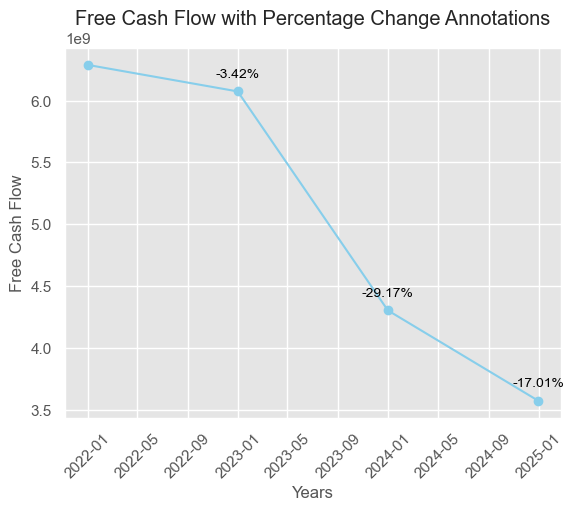

In [62]:
fig, ax = plt.subplots()

# Plot the Free Cash Flow data
ax.plot(free_cash_flow.index, free_cash_flow['Free Cash Flow'], marker = 'o', color = 'skyblue')

# Annotate the plot with percentage change values from free_cash_flow_pct_diff_df_T
for date, pct_change in free_cash_flow_pct_diff_df_T['% Change in Free Cash Flow'].items():
    if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
        # Adjust the text offset for better visibility below the markers
        ax.annotate(f'{pct_change:.2f}%', 
                    xy=(date, free_cash_flow.loc[date, 'Free Cash Flow']), 
                    xytext=(0, 10),  # Negative vertical offset to place text above the marker
                    textcoords='offset points',
                    fontsize=10, 
                    color='black', 
                    ha='center')  # Align text horizontally at the center of the point

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Free Cash Flow')
plt.title('Free Cash Flow with Percentage Change Annotations')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## 5.2 Cash Flow DF

In [63]:
cash_flow_df = cash_flow.loc[['Operating Cash Flow','Investing Cash Flow', 'Financing Cash Flow']]
cash_flow_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Operating Cash Flow,8.115000e+09,7.569000e+09,8.039000e+09,8.513000e+09,NaN
Investing Cash Flow,-5.433000e+09,-3.197000e+09,-4.954000e+09,-2.135000e+09,NaN
Financing Cash Flow,-2.164000e+09,-4.258000e+09,-5.844000e+09,-4.571000e+09,NaN


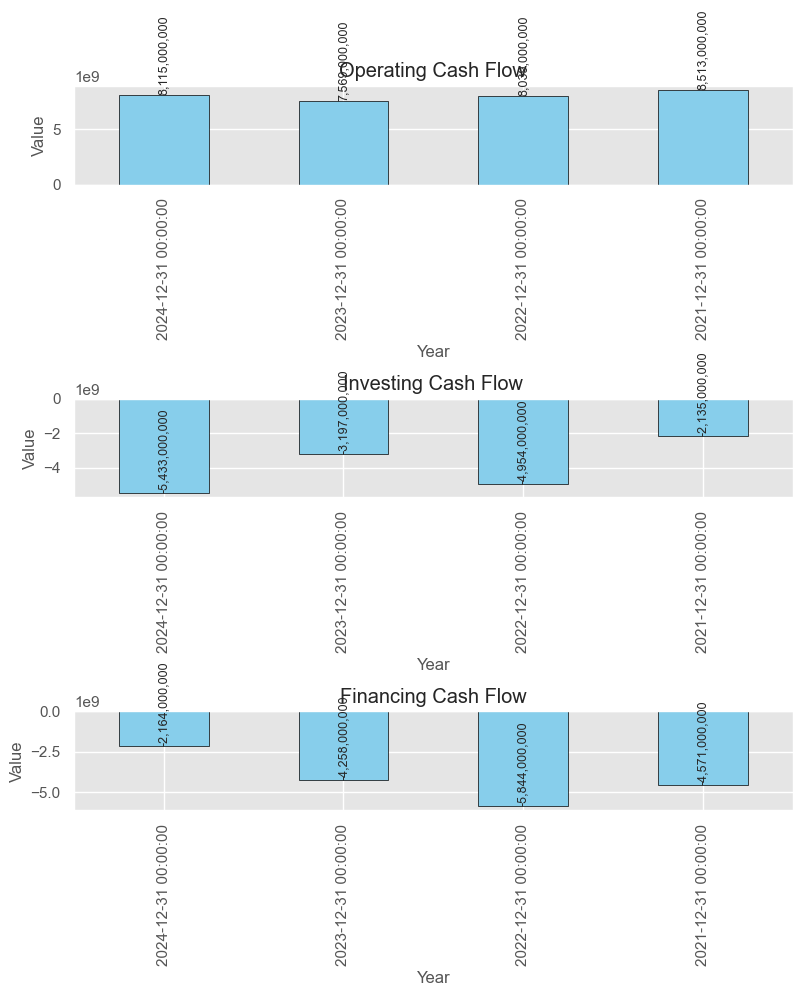

In [64]:
transposed_cash_flow_df = cash_flow_df.T.dropna()

# Plot each column as a bar plot in subplots
transposed_cash_flow_df.plot(
    kind='bar',
    subplots=True,
    figsize=(8, 10),
    sharex=False,
    sharey=False,
    legend=False,  # Hide legends since column names are the titles
    color='skyblue',
    edgecolor='black',
)

# Add titles and layout adjustments
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(transposed_cash_flow_df.columns[i])  # Set column names as titles
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
    for bar in ax.patches:
        height = bar.get_height()
        if not pd.isna(height):  # Annotate bar values
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:,.0f}",
                ha="center",
                va="bottom",
                fontsize=9,
                rotation=90,
            )

plt.tight_layout()
plt.show()

## 5.3 Percentage changes in Cash Flow DF

In [65]:
pct_diff_cash_flow_df = cash_flow_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(cash_flow_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_cash_flow_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_cash_flow_df

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Operating Cash Flow,7.213635,-5.846498,-5.567955,NaN
Investing Cash Flow,69.940569,-35.466290,132.037471,NaN
Financing Cash Flow,-49.178018,-27.138946,27.849486,NaN


In [66]:
transposed_pct_diff_cash_flow_df = pct_diff_cash_flow_df.T.dropna()
transposed_pct_diff_cash_flow_df

,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
2024 vs 2023,7.213635,69.940569,-49.178018
2023 vs 2022,-5.846498,-35.466290,-27.138946
2022 vs 2021,-5.567955,132.037471,27.849486


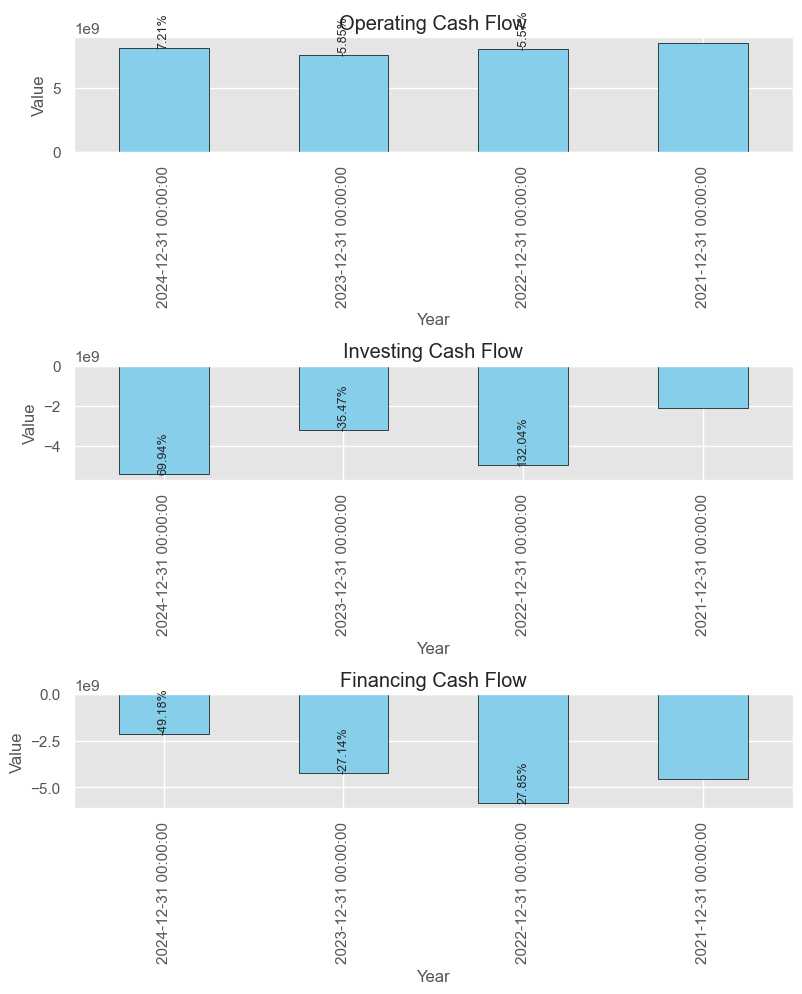

In [67]:
# Remove empty plots if any (subplots with no data)
fig, axes = plt.subplots(figsize=(8, 10), nrows=transposed_cash_flow_df.shape[1], ncols=1)

# Plot the raw cash flow data (values) and percentage changes
for i, ax in enumerate(axes):
    if i < transposed_cash_flow_df.shape[1]:  # Ensure we're within bounds
        # Plot each row (corresponding to a year) as a bar plot
        transposed_cash_flow_df.iloc[:, i].plot(
            kind='bar',
            ax=ax,
            color='skyblue',
            edgecolor='black',
            legend=False,
        )

        # Set the title and labels
        ax.set_title(transposed_cash_flow_df.columns[i])  # Set the title for each subplot
        ax.set_xlabel("Year")
        ax.set_ylabel("Value")

        # Add annotations for percentage changes
        for j, bar in enumerate(ax.patches):
            height = bar.get_height()

            if not pd.isna(height):  # Check if the value is not NaN
                # Extract the corresponding percentage change
                if j < len(transposed_pct_diff_cash_flow_df.index) and i < len(transposed_pct_diff_cash_flow_df.columns):
                    pct_change = transposed_pct_diff_cash_flow_df.iloc[j, i]  # Correct row and column access
                else:
                    pct_change = None

                if pd.notna(pct_change):  # Only annotate if the percentage change is available
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_height(),
                        f"{pct_change:.2f}%",  # Annotation with percentage change
                        ha="center",
                        va="bottom",
                        fontsize=9,
                        rotation=90,
                    )

plt.tight_layout()
plt.show()

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 6. Income Statement

In [68]:
income_statement = pd.DataFrame(stock.income_stmt).astype(float)
income_statement

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
Tax Rate For Calcs,1.077100e-02,7.718000e-03,1.439400e-02,1.500000e-02,NaN
Normalized EBITDA,9.587000e+09,9.047000e+09,8.915000e+09,7.982000e+09,NaN
Total Unusual Items,NaN,NaN,NaN,NaN,-2300000.0
Total Unusual Items Excluding Goodwill,NaN,NaN,NaN,NaN,-2300000.0
Net Income From Continuing Operation Net Minority Interest,5.901000e+09,5.532000e+09,5.490000e+09,4.638000e+09,NaN
Reconciled Depreciation,2.194000e+09,2.072000e+09,1.974000e+09,1.874000e+09,NaN
Reconciled Cost Of Revenue,4.904500e+10,4.301700e+10,5.150200e+10,3.507800e+10,NaN
EBITDA,9.587000e+09,9.047000e+09,8.915000e+09,7.982000e+09,NaN
EBIT,7.393000e+09,6.975000e+09,6.941000e+09,6.108000e+09,NaN


## 6.1 Income Statement DF

In [69]:
income_statement_df = income_statement.loc[['Total Revenue','Total Expenses','Net Income Common Stockholders',
                                                'Diluted EPS']]
income_statement_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Total Revenue,5.621900e+10,4.971500e+10,5.818600e+10,4.080700e+10,NaN
Total Expenses,4.928900e+10,4.324800e+10,5.174300e+10,3.528700e+10,NaN
Net Income Common Stockholders,5.841000e+09,5.479000e+09,5.441000e+09,4.597000e+09,NaN
Diluted EPS,2.690000e+00,2.520000e+00,2.500000e+00,2.100000e+00,NaN


In [70]:
pct_diff_income_statement_df = income_statement_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(income_statement_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_income_statement_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_income_statement_df

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Total Revenue,13.082571,-14.558485,42.588281,NaN
Total Expenses,13.968276,-16.417680,46.634738,NaN
Net Income Common Stockholders,6.607045,0.698401,18.359800,NaN
Diluted EPS,6.746032,0.800000,19.047619,NaN


In [71]:
transposed_df_income = income_statement_df.T.dropna()
transposed_df_income

,Total Revenue,Total Expenses,Net Income Common Stockholders,Diluted EPS
2024-12-31,5.621900e+10,4.928900e+10,5.841000e+09,2.69
2023-12-31,4.971500e+10,4.324800e+10,5.479000e+09,2.52
2022-12-31,5.818600e+10,5.174300e+10,5.441000e+09,2.50
2021-12-31,4.080700e+10,3.528700e+10,4.597000e+09,2.10


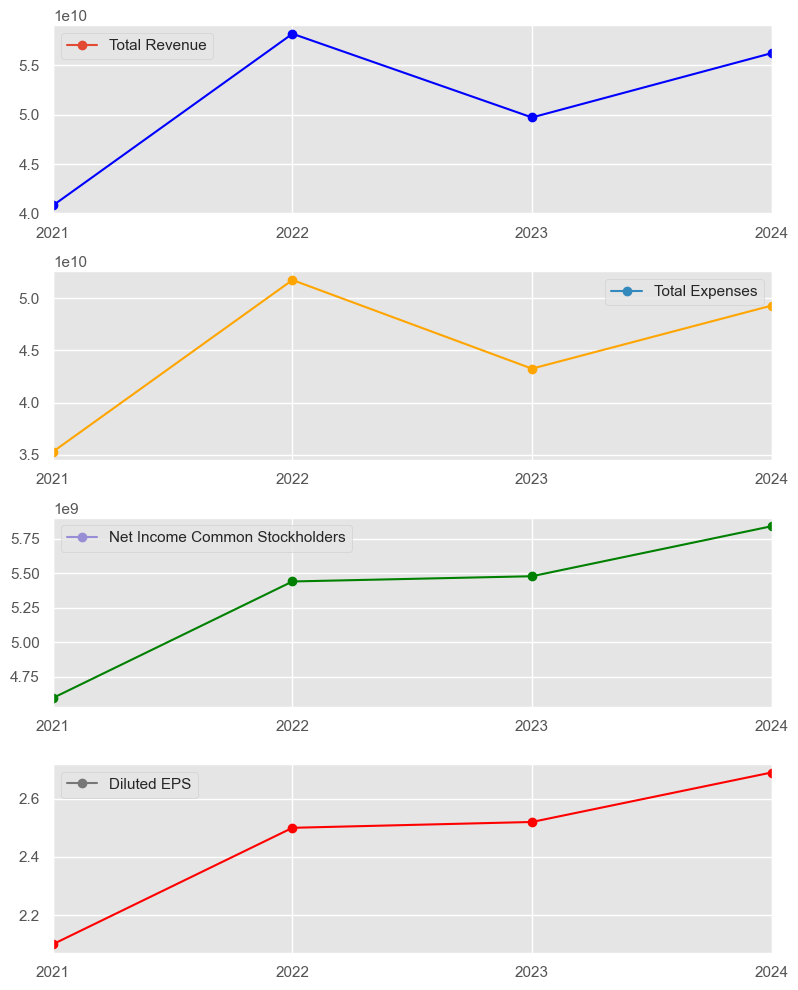

In [72]:
# Create subplots and assign unique colors
ax = transposed_df_income.plot(kind='line', marker='o', subplots=True, figsize=(8, 10), sharex=False, sharey=False)

# Assign distinct colors
for idx, axis in enumerate(ax):  # Loop through subplots
    color = colors[idx % len(colors)]  # Cycle through colors if needed
    for line in axis.get_lines():
        line.set_color(color)  # Apply unique color to each subplot

plt.tight_layout()
plt.show()

## 6.2 Percentage changes in Income Statement DF

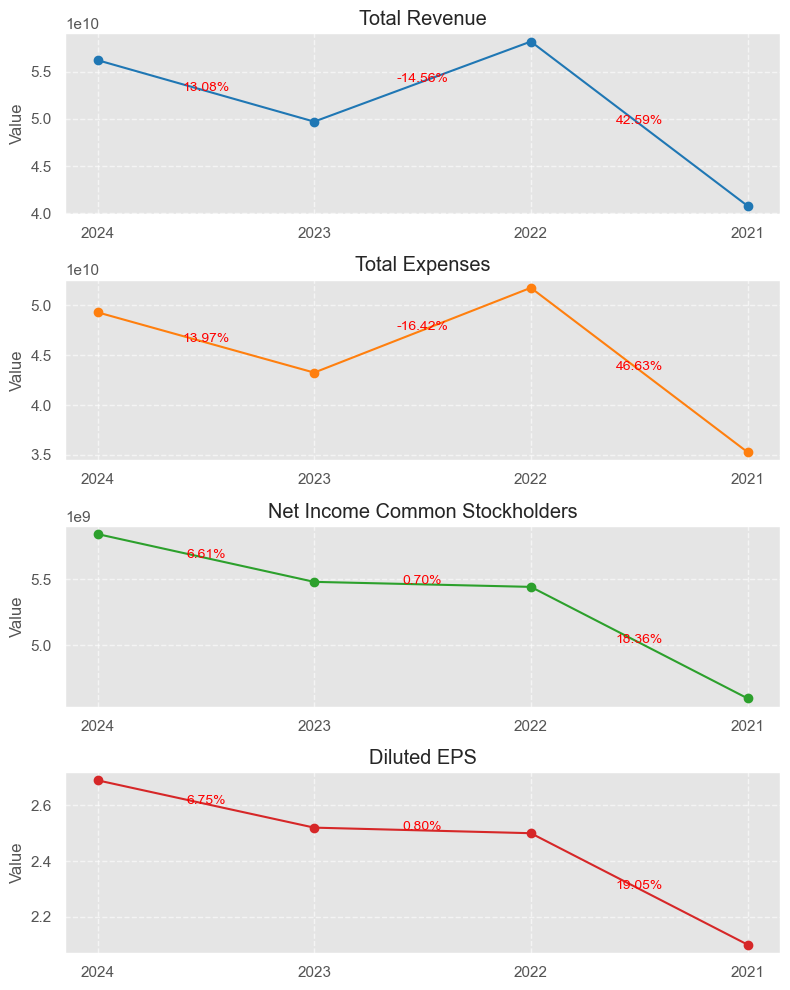

In [73]:
# Convert column names to years
years = [str(col.year) for col in income_statement_df.columns]

# Define colors
colors = plt.cm.tab10.colors

# Plot each row separately
fig, axes = plt.subplots(nrows=len(income_statement_df), figsize=(8, 10), sharex=False, sharey=False)

for idx, (ax, (row, values)) in enumerate(zip(axes, income_statement_df.iterrows())):
    color = colors[idx % len(colors)]  # Assign unique color
    ax.plot(years, values, marker='o', linestyle='-', label=row, color=color)
    ax.set_title(row)
    ax.set_ylabel("Value")
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Add percentage annotations
    pct_changes = pct_diff_income_statement_df.loc[row].values  # Convert to array for indexing
    for i in range(len(pct_changes)):
        if not np.isnan(pct_changes[i]):
            ax.text(i + 0.5, (values.iloc[i] + values.iloc[i+1]) / 2, f"{pct_changes[i]:.2f}%", 
                    fontsize=10, color='red', ha='center')

plt.tight_layout()
plt.show()

## 6.3 Income Statement for the last year with Vertical Analysis

In [74]:
income_statement_last = pd.DataFrame(income_statement.iloc[:,0])
income_statement_last

,2024-12-31
Tax Effect Of Unusual Items,0.000000e+00
Tax Rate For Calcs,1.077100e-02
Normalized EBITDA,9.587000e+09
Total Unusual Items,NaN
Total Unusual Items Excluding Goodwill,NaN
Net Income From Continuing Operation Net Minority Interest,5.901000e+09
Reconciled Depreciation,2.194000e+09
Reconciled Cost Of Revenue,4.904500e+10
EBITDA,9.587000e+09
EBIT,7.393000e+09


In [75]:
revenue = income_statement_last.loc['Operating Revenue'].values[0]
income_statement_last['Percentage from Operating Revenue'] = income_statement_last.iloc[:, [0]] / revenue * 100
income_statement_last

,2024-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00
Tax Rate For Calcs,1.077100e-02,1.915900e-11
Normalized EBITDA,9.587000e+09,1.705295e+01
Total Unusual Items,NaN,NaN
Total Unusual Items Excluding Goodwill,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,5.901000e+09,1.049645e+01
Reconciled Depreciation,2.194000e+09,3.902595e+00
Reconciled Cost Of Revenue,4.904500e+10,8.723919e+01
EBITDA,9.587000e+09,1.705295e+01
EBIT,7.393000e+09,1.315036e+01


## 6.4 Income Statement for the previous year with Vertical Analysis

In [76]:
income_statement_prev = pd.DataFrame(income_statement.iloc[:,1])
income_statement_prev

,2023-12-31
Tax Effect Of Unusual Items,0.000000e+00
Tax Rate For Calcs,7.718000e-03
Normalized EBITDA,9.047000e+09
Total Unusual Items,NaN
Total Unusual Items Excluding Goodwill,NaN
Net Income From Continuing Operation Net Minority Interest,5.532000e+09
Reconciled Depreciation,2.072000e+09
Reconciled Cost Of Revenue,4.301700e+10
EBITDA,9.047000e+09
EBIT,6.975000e+09


In [77]:
revenue = income_statement_prev.loc['Operating Revenue'].values[0]
income_statement_prev['Percentage from Operating Revenue'] = income_statement_prev.iloc[:, [0]] / revenue * 100
income_statement_prev

,2023-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00
Tax Rate For Calcs,7.718000e-03,1.552449e-11
Normalized EBITDA,9.047000e+09,1.819773e+01
Total Unusual Items,NaN,NaN
Total Unusual Items Excluding Goodwill,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,5.532000e+09,1.112743e+01
Reconciled Depreciation,2.072000e+09,4.167756e+00
Reconciled Cost Of Revenue,4.301700e+10,8.652721e+01
EBITDA,9.047000e+09,1.819773e+01
EBIT,6.975000e+09,1.402997e+01


## 6.5 Income Statement for the last two years with Vertical Analysis

In [78]:
df_concat_income = pd.concat([income_statement_last, income_statement_prev], axis=1)
df_concat_income

,2024-12-31 00:00:00,Percentage from Operating Revenue,2023-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tax Rate For Calcs,1.077100e-02,1.915900e-11,7.718000e-03,1.552449e-11
Normalized EBITDA,9.587000e+09,1.705295e+01,9.047000e+09,1.819773e+01
Total Unusual Items,NaN,NaN,NaN,NaN
Total Unusual Items Excluding Goodwill,NaN,NaN,NaN,NaN
Net Income From Continuing Operation Net Minority Interest,5.901000e+09,1.049645e+01,5.532000e+09,1.112743e+01
Reconciled Depreciation,2.194000e+09,3.902595e+00,2.072000e+09,4.167756e+00
Reconciled Cost Of Revenue,4.904500e+10,8.723919e+01,4.301700e+10,8.652721e+01
EBITDA,9.587000e+09,1.705295e+01,9.047000e+09,1.819773e+01
EBIT,7.393000e+09,1.315036e+01,6.975000e+09,1.402997e+01


In [79]:
df_concat_income.loc['Operating Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  56219000000.000000
Percentage from Operating Revenue            100.000000
2023-12-31 00:00:00                  49715000000.000000
Percentage from Operating Revenue            100.000000
Name: Operating Revenue, dtype: object

In [80]:
df_concat_income.loc['Cost Of Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)


2024-12-31 00:00:00                  49045000000.000000
Percentage from Operating Revenue             87.239190
2023-12-31 00:00:00                  43017000000.000000
Percentage from Operating Revenue             86.527205
Name: Cost Of Revenue, dtype: object

In [81]:
df_concat_income.loc['Gross Profit'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  7174000000.000000
Percentage from Operating Revenue            12.760810
2023-12-31 00:00:00                  6698000000.000000
Percentage from Operating Revenue            13.472795
Name: Gross Profit, dtype: object

In [82]:
df_concat_income.loc['Operating Expense'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  244000000.000000
Percentage from Operating Revenue            0.434017
2023-12-31 00:00:00                  231000000.000000
Percentage from Operating Revenue            0.464648
Name: Operating Expense, dtype: object

In [83]:
df_concat_income.loc['Operating Income'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  6930000000.000000
Percentage from Operating Revenue            12.326793
2023-12-31 00:00:00                  6467000000.000000
Percentage from Operating Revenue            13.008146
Name: Operating Income, dtype: object

In [84]:
df_concat_income.loc['Net Income Common Stockholders'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  5841000000.000000
Percentage from Operating Revenue            10.389726
2023-12-31 00:00:00                  5479000000.000000
Percentage from Operating Revenue            11.020819
Name: Net Income Common Stockholders, dtype: object

In [85]:
df_concat_income.loc['EBITDA'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  9587000000.000000
Percentage from Operating Revenue            17.052954
2023-12-31 00:00:00                  9047000000.000000
Percentage from Operating Revenue            18.197727
Name: EBITDA, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 7. Retained Earnings vs Shareholders' Equity, Total Liabilities, Long Term Debt and Net Income

1) Retained Earnings are a component of shareholders' equity. Comparing the two shows how much of the equity comes from retained earnings versus other sources like common stock or additional paid-in capital.
2) Understanding how Retained Earnings grow relative to liabilities helps analyze the company's risk and leverage. A healthy company might show increasing retained earnings alongside controlled liability growth.
3) Retained Earnings are directly linked to net income. Showing the two together illustrates how much of the profit is retained versus paid out or otherwise allocated.

In [86]:
data = {}

In [87]:
try:
  retained_earnings = balance_sheet_df.loc['Retained Earnings']
  print(retained_earnings)
  data["Retained Earnings"] = retained_earnings
except Exception:
  print("An exception occurred") 

An exception occurred


In [88]:
try:
  equity = balance_sheet_df.loc['Common Stock Equity']
  print(equity)
except Exception:
  print("An exception occurred")

2024-12-31    2.873200e+10
2023-12-31    2.767300e+10
2022-12-31    2.662300e+10
2021-12-31    2.532900e+10
2020-12-31             NaN
Name: Common Stock Equity, dtype: float64


In [89]:
 try:
  long_term_debt = balance_sheet_df.loc['Long Term Debt']
  data["Long Term Debt"] = long_term_debt
  print(long_term_debt)
except Exception:
  print("An exception occurred")

2024-12-31    3.074600e+10
2023-12-31    2.744800e+10
2022-12-31    2.655100e+10
2021-12-31    2.813500e+10
2020-12-31             NaN
Name: Long Term Debt, dtype: float64


In [90]:
try:
  total_liabilities = balance_sheet_df.loc['Total Liabilities Net Minority Interest']
  data["Total Liabilities"] = total_liabilities
  print(total_liabilities)
except Exception:
  print("An exception occurred") 

2024-12-31    4.757900e+10
2023-12-31    4.222300e+10
2022-12-31    4.040600e+10
2021-12-31    4.108700e+10
2020-12-31             NaN
Name: Total Liabilities Net Minority Interest, dtype: float64


In [91]:
try:
  net_income = income_statement.loc['Net Income Common Stockholders']
  data["Net Income"] = net_income
  print(net_income)
except Exception:
  print("An exception occurred") 

2024-12-31    5.841000e+09
2023-12-31    5.479000e+09
2022-12-31    5.441000e+09
2021-12-31    4.597000e+09
2020-12-31             NaN
Name: Net Income Common Stockholders, dtype: float64


In [92]:
if data:
    df_RE = pd.DataFrame(data)
    print(df_RE)
else:
    print("No data available to plot.")

            Long Term Debt  Total Liabilities    Net Income
2024-12-31    3.074600e+10       4.757900e+10  5.841000e+09
2023-12-31    2.744800e+10       4.222300e+10  5.479000e+09
2022-12-31    2.655100e+10       4.040600e+10  5.441000e+09
2021-12-31    2.813500e+10       4.108700e+10  4.597000e+09
2020-12-31             NaN                NaN           NaN


In [93]:
df_RE = df_RE.T
df_RE

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Long Term Debt,3.074600e+10,2.744800e+10,2.655100e+10,2.813500e+10,NaN
Total Liabilities,4.757900e+10,4.222300e+10,4.040600e+10,4.108700e+10,NaN
Net Income,5.841000e+09,5.479000e+09,5.441000e+09,4.597000e+09,NaN


In [94]:
if data:
    pct_diff_RE = df_RE.apply(calculate_pct_diff, axis=1, result_type='expand')

    # Convert column names to datetime and format them properly
    year_columns = pd.to_datetime(df_RE.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
    pct_diff_RE.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]
    print(pct_diff_RE)

else:
    print("No data available to plot.")

                   2024 vs 2023  2023 vs 2022  2022 vs 2021  2021 vs 2020
Long Term Debt        12.015447      3.378404     -5.629998           NaN
Total Liabilities     12.685029      4.496857     -1.657459           NaN
Net Income             6.607045      0.698401     18.359800           NaN


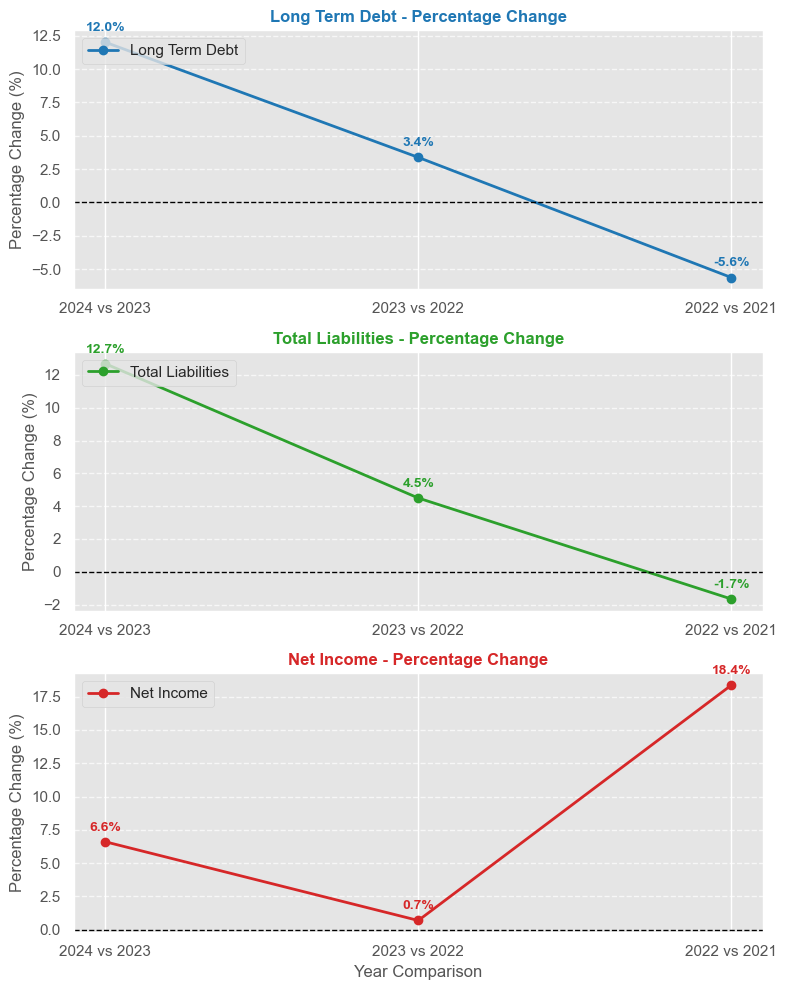

In [95]:
try:
    # Transpose the DataFrame for plotting
    pct_diff_RE = pct_diff_RE.T

    # Define a color palette
    colors = ['tab:blue', 'tab:green', 'tab:red']

    # Create subplots
    fig, axes = plt.subplots(nrows=len(pct_diff_RE.columns), ncols=1, figsize=(8, 10), sharex=False)

    # Iterate over each financial metric and plot separately
    for ax, (metric, color) in zip(axes, zip(pct_diff_RE.columns, colors)):
        ax.plot(pct_diff_RE.index, pct_diff_RE[metric], marker='o', linestyle='-', linewidth=2, label=metric, color=color)

        # Add annotations for each point
        for i, value in enumerate(pct_diff_RE[metric]):
            if pd.notna(value):  # Avoid NaN values
                ax.annotate(f"{value:.1f}%", (i, value), textcoords="offset points",
                            xytext=(0, 8), ha='center', fontsize=10, fontweight='bold', color=color)

        # Formatting for each subplot
        ax.axhline(0, color='black', linewidth=1, linestyle='dashed')  # Reference line at 0%
        ax.set_ylabel("Percentage Change (%)")
        ax.set_title(f"{metric} - Percentage Change", fontsize=12, fontweight='bold', color=color)
        ax.grid(axis='y', linestyle="--", alpha=0.7)
        ax.legend(loc="upper left")

    # Adjust layout
    plt.xlabel("Year Comparison")
    plt.xticks(rotation=0)  # Keep x-axis labels horizontal
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("An error occurred")

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 8. Ratio Analysis

__Gross Profit Margin__

In [96]:
gross_profit_margin = (income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) - income_statement.loc['Cost Of Revenue'].replace(0, np.nan).astype(float)) / income_statement_df.loc['Total Revenue'].replace(0, np.nan).astype(float) * 100
gross_profit_margin

2024-12-31    12.760810
2023-12-31    13.472795
2022-12-31    11.487299
2021-12-31    14.039258
2020-12-31          NaN
dtype: float64

__Operating Profit Margin__

In [97]:
operating_profit_margin = (income_statement.loc['Operating Income'].replace(0, np.nan).astype(float) /  income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
operating_profit_margin

2024-12-31    12.326793
2023-12-31    13.008146
2022-12-31    11.073110
2021-12-31    13.527091
2020-12-31          NaN
dtype: float64

__Net Profit Margin__

In [98]:
net_profit_margin = (income_statement.loc['Net Income'].replace(0, np.nan).astype(float)/ income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
net_profit_margin

2024-12-31    10.496451
2023-12-31    11.127426
2022-12-31     9.435259
2021-12-31    11.365697
2020-12-31          NaN
dtype: float64

__Current Ratio__

In [99]:
current_ratio = balance_sheet_df.loc['Current Assets'].replace(0, np.nan).astype(float) / balance_sheet_df.loc['Current Liabilities'].replace(0, np.nan).astype(float)
current_ratio

2024-12-31    0.997101
2023-12-31    0.932755
2022-12-31    0.864085
2021-12-31    1.141505
2020-12-31         NaN
dtype: float64

__Accounts Receivable Turnover__ <br>
The Accounts Receivable Turnover Ratio measures how efficiently a company collects its receivables. A higher ratio indicates effective collection processes and efficient use of assets.

In [100]:
ART = (income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) - income_statement.loc['Net Income'].replace(0, np.nan).astype(float)) / balance_sheet_df.loc['Accounts Receivable'] 
ART

2024-12-31    5.448029
2023-12-31    5.690019
2022-12-31    7.566916
2021-12-31    5.191474
2020-12-31         NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 9. ROIC & WACC

__ROIC__

In [101]:
nopat = income_statement.loc["EBIT"].replace(0, np.nan).astype(float) * (1 - income_statement.loc["Tax Provision"] / income_statement.loc["Pretax Income"].replace(0, np.nan).astype(float))
nopat

2024-12-31    7.313374e+09
2023-12-31    6.921167e+09
2022-12-31    6.841094e+09
2021-12-31    6.019387e+09
2020-12-31             NaN
dtype: float64

In [102]:
invested_capital = balance_sheet_df.loc['Long Term Debt And Capital Lease Obligation'].replace(0, np.nan).astype(float) + balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
invested_capital

2024-12-31    5.984400e+10
2023-12-31    5.544400e+10
2022-12-31    5.351500e+10
2021-12-31    5.380300e+10
2020-12-31             NaN
dtype: float64

In [103]:
balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)

2024-12-31    2.873200e+10
2023-12-31    2.767300e+10
2022-12-31    2.662300e+10
2021-12-31    2.532900e+10
2020-12-31             NaN
Name: Common Stock Equity, dtype: float64

In [104]:
ROIC = nopat / invested_capital
ROIC

2024-12-31    0.122207
2023-12-31    0.124832
2022-12-31    0.127835
2021-12-31    0.111878
2020-12-31         NaN
dtype: float64

__WACC__

In [105]:
def calculate_wacc(E, D, Ke, Kd, tax_rate):
    equity_weight = E / (E + D)
    debt_weight = D / (E + D)
    wacc = (equity_weight * Ke) + (debt_weight * Kd) * (1 - tax_rate)
    return wacc

In [106]:
E = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
D = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
Ke = 0.1
Kd = 0.06
tax_rate = 0.3

In [107]:
wacc_result = calculate_wacc(E, D, Ke, Kd, tax_rate)
wacc_result

2024-12-31    0.070018
2023-12-31    0.071118
2022-12-31    0.071039
2021-12-31    0.069478
2020-12-31         NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 10. Long-term Debt to Equity Ratio & ICR

__DE__

In [108]:
balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)

2024-12-31    3.074600e+10
2023-12-31    2.744800e+10
2022-12-31    2.655100e+10
2021-12-31    2.813500e+10
2020-12-31             NaN
Name: Long Term Debt, dtype: float64

In [109]:
balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)

2024-12-31    2.873200e+10
2023-12-31    2.767300e+10
2022-12-31    2.662300e+10
2021-12-31    2.532900e+10
2020-12-31             NaN
Name: Common Stock Equity, dtype: float64

In [110]:
debt_equity_ratio = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float).astype(float) / balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float) 
debt_equity_ratio

2024-12-31    1.070096
2023-12-31    0.991869
2022-12-31    0.997296
2021-12-31    1.110782
2020-12-31         NaN
dtype: float64

__ICR__

In [111]:
income_statement.loc['EBIT'].replace(0, np.nan).astype(float)

2024-12-31    7.393000e+09
2023-12-31    6.975000e+09
2022-12-31    6.941000e+09
2021-12-31    6.108000e+09
2020-12-31             NaN
Name: EBIT, dtype: float64

In [112]:
ICR = income_statement.loc['EBIT'].replace(0, np.nan).astype(float) / income_statement.loc['Interest Expense'].replace(0, np.nan).astype(float)
ICR

2024-12-31    5.444035
2023-12-31    5.474882
2022-12-31    5.579582
2021-12-31    4.760717
2020-12-31         NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 11. Total Debt to Free Cash Flow

In [113]:
total_debt = balance_sheet_df.loc['Long Term Debt And Capital Lease Obligation'].replace(0, np.nan).astype(float) + balance_sheet_df.loc['Current Debt'].replace(0, np.nan).astype(float)
total_debt

2024-12-31    3.226200e+10
2023-12-31    2.907100e+10
2022-12-31    2.863600e+10
2021-12-31    2.987400e+10
2020-12-31             NaN
dtype: float64

In [114]:
total_debt / cash_flow.loc['Free Cash Flow'].replace(0, np.nan).astype(float)

2024-12-31    9.034444
2023-12-31    6.755984
2022-12-31    4.713745
2021-12-31    4.749444
2020-12-31         NaN
dtype: float64

__Indicates how many years it would take to pay off debt using FCF.__ <br>
__Low ratio (<3 years) → Strong financial position (company can pay off debt quickly).<br>
High ratio (>5 years) → Potential debt repayment risk.<br>
Negative FCF → The ratio is meaningless since the company isn't generating enough cash.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 12. Operating Cash to Total Debt

In [115]:
operating_cash = cash_flow.loc['Operating Cash Flow'].replace(0, np.nan).astype(float)
operating_cash

2024-12-31    8.115000e+09
2023-12-31    7.569000e+09
2022-12-31    8.039000e+09
2021-12-31    8.513000e+09
2020-12-31             NaN
Name: Operating Cash Flow, dtype: float64

In [116]:
total_debt = balance_sheet_df.loc['Total Debt'].replace(0, np.nan).astype(float)
total_debt

2024-12-31    3.226200e+10
2023-12-31    2.907100e+10
2022-12-31    2.863600e+10
2021-12-31    2.987400e+10
2020-12-31             NaN
Name: Total Debt, dtype: float64

In [117]:
operating_cash_To_total_debt = operating_cash / total_debt
operating_cash_To_total_debt

2024-12-31    0.251534
2023-12-31    0.260363
2022-12-31    0.280731
2021-12-31    0.284964
2020-12-31         NaN
dtype: float64

__When Operating Cash to Debt ratio is close to 100% or 1, quick measure confirming that company has solid financials to pay off debt.__ <br>
__> 0.2 (20%)	Healthy cash flow compared to debt. The company can cover its debt.__ <br>
__≈ 0.1 to 0.2 (10-20%)	Moderate coverage. The company generates enough cash flow, but managing its debt levels could be challenging if cash flow drops.__ <br>
__< 0.1 (10%)	Low cash flow relative to debt. The company is at risk if there are downturns, as it may struggle to meet debt obligations.__ <br>
__< 0 (negative)	Negative operating cash flow. The company is not generating enough cash from operations to cover its debt and might be relying on external financing.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 13. Operating Cash to Market capitalization

In [118]:
operating_cash_last = cash_flow.loc['Operating Cash Flow'].iloc[0]
operating_cash_last

8115000000.0

In [119]:
operating_cash_To_market_cap = operating_cash_last / market_cap
operating_cash_To_market_cap

0.1119861368273417

In [120]:
dif_for_non_current_assets = market_cap - operating_cash_last
dif_for_non_current_assets

64349326656.0

In [121]:
real_non_current_assets = balance_sheet_df.iloc[:,0].loc['Total Non Current Assets']
real_non_current_assets

62035000000.0

__When Cash to Market Cap > 0.7 (>70%), market is valuing rest of balance sheet potentially at scrap prices / liquidation prices.__<br>
__> 10% (0.10)	Strong cash flow relative to market value. The stock may be undervalued.__<br>
__≈ 5%-10% (0.05 - 0.10) ==> Healthy cash generation. A balanced valuation.__<br>
__< 5% (0.05)	Low cash flow compared to market cap. The stock may be overvalued or focused on growth.__<br>
__< 0 (negative)	Negative cash flow—company may be burning cash. Possible financial distress.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 14. Operating Cash to Net Income 

In [122]:
cash_flow.loc['Operating Cash Flow'].replace(0, np.nan).astype(float)/ income_statement_df.loc['Net Income Common Stockholders'].replace(0, np.nan).astype(float)


2024-12-31    1.389317
2023-12-31    1.381456
2022-12-31    1.477486
2021-12-31    1.851860
2020-12-31         NaN
dtype: float64

__> 1 Strong cash flow. The company generates more cash than its reported net income (good for financial health).__ <br>
__≈ 1	Net income and cash flow are closely aligned, suggesting good earnings quality.__ <br>
__< 1	Earnings are higher than cash flow. Possible reasons: aggressive revenue recognition, high non-cash expenses, or rising working capital.__ <br>
__< 0 (negative)	Operating cash flow is negative, meaning the company burns cash while reporting net income (could signal financial distress).__


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font>